In [2]:
import io
import glob
import math

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams


from sklearn import metrics



In [3]:
data = pd.read_csv("planilhas/dfRegressaoDias.csv", sep=';', parse_dates=['Data'], index_col="Data")

train, test = np.split(data, [int(.85*len(data))])

train, test

c:\Users\Bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


(            CasosDia
 Data                
 2020-03-15         3
 2020-03-16         3
 2020-03-17         3
 2020-03-18         1
 2020-03-19         0
 ...              ...
 2023-03-14        27
 2023-03-15        26
 2023-03-16        13
 2023-03-17        23
 2023-03-18        16
 
 [1099 rows x 1 columns],
             CasosDia
 Data                
 2023-03-19         1
 2023-03-20        24
 2023-03-21        24
 2023-03-22        29
 2023-03-23        18
 ...              ...
 2023-09-24         0
 2023-09-25        13
 2023-09-26        14
 2023-09-27        17
 2023-09-28         2
 
 [194 rows x 1 columns])

In [8]:
optimal_n = None
best_mse = None

db = data[['CasosDia']].values.astype('float32')

mean_results_for_all_possible_n_values = np.zeros(int(len(db) / 8 - 2))

for n in range(3, int(len(db) / 8 + 1)): #goes from 3 to 19
  mean_for_n = np.zeros(len(db) - n)
  for i in range(0, len(db) - n):
    mean_for_n[i] = np.power(np.mean(db[:, 0][i:i+n]) - db[i + n][0], 2)
  mean_results_for_all_possible_n_values[n - 3] = np.mean(mean_for_n)

optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3
best_mse = np.min(mean_results_for_all_possible_n_values)

#print("MSE = %s" % mean_results_for_all_possible_n_values)
#print("Melhor MSE = %s" % best_mse)
#print("Otimo n = %s" % optimal_n)

forecast = np.zeros(len(db))

for i in range(0,len(train)):
  forecast[i] == None

for i in range(len(train), len(db)):
  forecast[i] = db[i][0]

print(forecast)

for i in range(0, len(forecast)):
  forecast[i] = np.mean(db[:, 0][i:i+optimal_n])

future_forecast = forecast[len(train):]
print(future_forecast, len(future_forecast), len(test))

# plt.plot(db, color='red', label = 'Casos reais')
# plt.plot(future_forecast, color='blue', label = 'Casos previstos')
# plt.legend()
# plt.show()


mae_media_movel = metrics.mean_absolute_error(test['CasosDia'], future_forecast)
mse_media_movel = metrics.mean_squared_error(test['CasosDia'], future_forecast)
print("MEAN ABSOLUTE ERROR =", mae_media_movel)
print("MEAN SQUARED ERROR =", mse_media_movel)
import math
rmse_media_movel = math.sqrt(mse_media_movel)
print("ROOT MEAN SQUARED ERROR =", rmse_media_movel)

[ 0.  0.  0. ... 14. 17.  2.]
[14.375      16.125      15.         14.5        12.125      11.5
 10.875       9.625      11.5        14.125      15.25       16.25
 16.625      15.5        15.375      18.125      18.375      16.
 14.125      12.5        11.75       11.5        12.5        10.5
  9.25        8.75        7.75        6.          5.25        7.75
  7.875       9.         10.375      10.         10.25       10.25
 11.125       9.625       9.5         8.5         7.625       6.625
  6.75        7.5         8.875       8.25        8.25        8.
  6.5         6.375       6.75        6.875       5.625       6.5
  6.25        5.75        5.625       6.75        6.25        6.375
  6.375       5.5         4.75        4.875       5.625       5.125
  5.25        4.375       3.5         2.875       2.75        2.875
  2.625       2.625       2.125       2.125       2.125       2.125
  2.75        2.625       2.375       2.          2.375       2.125
  1.875       2.125       1.5    

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_error

# SAVE DF WITH FORECAST AND REAL
df_real_forecast = pd.DataFrame(test['CasosDia'])
# df_real_forecast = df_real_forecast.assign(Qtde_Casos=y_test)
df_real_forecast = df_real_forecast.assign(Forecast=future_forecast)
print(df_real_forecast)

df_real_forecast.to_csv('resultadosModelos/MediaMovelAngelo', sep=';', index=False)

mse = mean_squared_error(df_real_forecast['Forecast'], df_real_forecast['CasosDia'])
mae = mean_absolute_error(df_real_forecast['Forecast'], df_real_forecast['CasosDia'])
rmse = math.sqrt(mse)

print('------ RESULTADOS ------')
# print('PARAMETROS: ', rf_rmse_params)
print('MSE: ', mse)
print('MAE: ', mae)
print('RMSE: ', rmse)

# SAVE DF WITH METRICS AND PARAMS
mm_metrics = pd.DataFrame()
mm_metrics = mm_metrics.assign(PARAMS=[optimal_n])
mm_metrics = mm_metrics.assign(MSE=mse)
mm_metrics = mm_metrics.assign(MAE=mae)
mm_metrics = mm_metrics.assign(RMSE=rmse)
print(mm_metrics)
mm_metrics.to_csv('resultadosModelos/metrics', sep=';', index=False)

            CasosDia  Forecast
Data                          
2023-03-19         1    14.375
2023-03-20        24    16.125
2023-03-21        24    15.000
2023-03-22        29    14.500
2023-03-23        18    12.125
...              ...       ...
2023-09-24         0     9.200
2023-09-25        13    11.500
2023-09-26        14    11.000
2023-09-27        17     9.500
2023-09-28         2     2.000

[194 rows x 2 columns]
------ RESULTADOS ------
MSE:  21.180468326217873
MAE:  2.9869477183548447
RMSE:  4.602224280303805
   PARAMS        MSE       MAE      RMSE
0       8  21.180468  2.986948  4.602224


In [6]:
# PLOT FORECAST PERIOD
rcParams['figure.figsize'] = 15,6

casos_reais = df_real_forecast['Qtde_Casos']
forecast = df_real_forecast['Forecast']

plt.plot(casos_reais, color='red', label='Casos reais')
plt.plot(forecast, color='blue', label='Casos previstos')
plt.title('Predição de casos de dengue - Média Móvel')
plt.xlabel('Tempo')
plt.ylabel('Casos de dengue')
plt.legend()
plt.show
plt.savefig('/content/drive/My Drive/Artigo Reciis/Graficos/MM_monthly_1.png', dpi=300, bbox_inches='tight')

KeyError: 'Qtde_Casos'

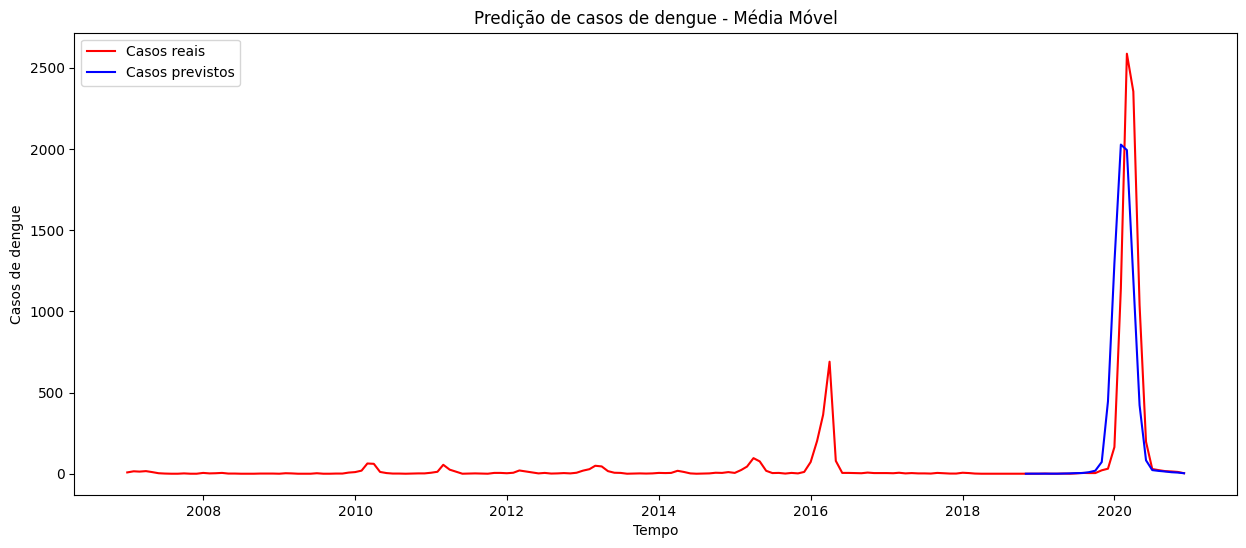

In [ ]:
# PLOT FULL TIME SERIE
rcParams['figure.figsize'] = 15,6

plt.plot(data['Qtde_Casos'], color='red', label='Casos reais')
plt.plot(forecast, color='blue', label='Casos previstos')
plt.title('Predição de casos de dengue - Média Móvel')
plt.xlabel('Tempo')
plt.ylabel('Casos de dengue')
plt.legend()
plt.show
plt.savefig('/content/drive/My Drive/Artigo Reciis/Graficos/MM_monthly_2.png', dpi=300, bbox_inches='tight')